In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

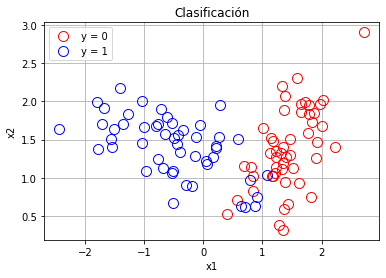

In [69]:
df = pd.read_csv('df_clasificacion_1.cvs')
#print(df)

x1 = np.asanyarray(df[['x1']])           
x2 = np.asanyarray(df[['x2']])

x = np.concatenate((x1,x2),axis=1) 
y = np.asanyarray(df['y'])

#Graficando
plt.figure()
plt.grid()

plt.plot(x[y==0,0],x[y==0,1],'ro',fillstyle = 'none', markersize = 10)
plt.plot(x[y==1,0],x[y==1,1],'bo',fillstyle = 'none', markersize = 10)

plt.title('Clasificación')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['y = 0','y = 1'])
plt.show()

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [70]:
model = Sequential()

model.add(Dense(32,activation='relu',input_shape=[x.shape[1]]))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
hist = model.fit(xtrain,ytrain,batch_size=10,epochs=1500,verbose=0,validation_data=(xtest,ytest))

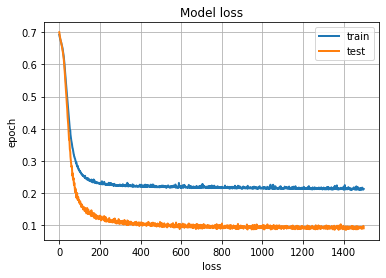

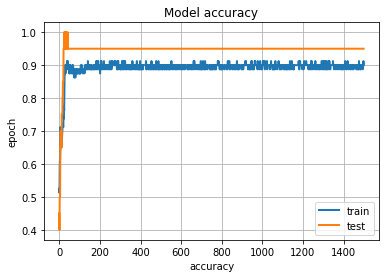

In [67]:
plt.figure()
plt.grid()
plt.plot(hist.history['loss'],lw=2)
plt.plot(hist.history['val_loss'],lw=2)
plt.title('Model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'])
plt.show()

plt.figure()
plt.grid()
plt.plot(hist.history['accuracy'],lw=2)
plt.plot(hist.history['val_accuracy'],lw=2)
plt.title('Model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'])
plt.show()

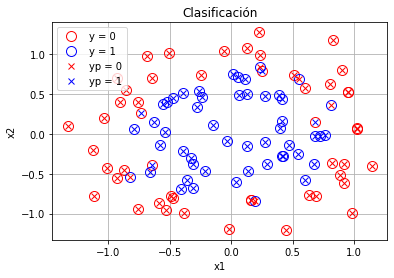


Métricas: 
               precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        50
         1.0       0.92      0.90      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

Matriz de confusión: 
 [[46  4]
 [ 5 45]]


In [68]:
ypred = model.predict(x)
ypred = ypred.ravel()>0.5;

plt.figure()
plt.grid()

plt.plot(x[y==0,0],x[y==0,1],'ro',fillstyle = 'none', markersize = 10)
plt.plot(x[y==1,0],x[y==1,1],'bo',fillstyle = 'none', markersize = 10)

plt.plot(x[ypred==0,0],x[ypred==0,1],'rx',fillstyle = 'none')
plt.plot(x[ypred==1,0],x[ypred==1,1],'bx',fillstyle = 'none')

plt.title('Clasificación')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['y = 0','y = 1','yp = 0','yp = 1'])
plt.show()

print('\nMétricas: \n', classification_report(y,ypred));

print('Matriz de confusión: \n', confusion_matrix(y,ypred))